# Convolutional kernels - Blurring and Thresholding

In [1]:
# We need to include the home idrectory in our path, so we can read in our own module
import os
import sys
sys.path.append(os.path.join(".."))
# image processing and numerical tools
import cv2
import numpy as np
# plotting utils
from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel
import matplotlib.pyplot as plt

In [2]:
filename = os.path.join("..", "cds-visual", "data", "img", "trex.png")

In [3]:
image = cv2.imread(filename)

# Blurring with convolutional kernels

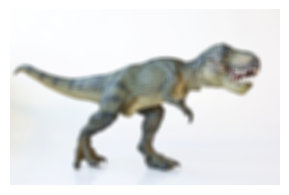

In [9]:
# the numbers are the dimensions of the kernel
show(cv2.blur(image, (7,7)))

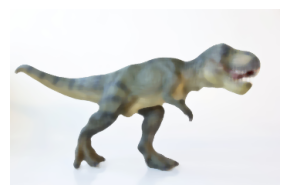

In [13]:
# note the camel ase and only requiring a single integer instead of a tuple
show(cv2.medianBlur(image, 7))

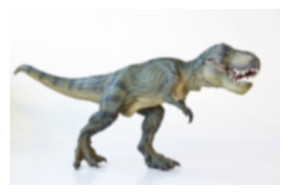

In [16]:
show(cv2.GaussianBlur(image, (7,7), 0))

In [17]:
blurred_stack = np.hstack([cv2.blur(image, (3,3)),cv2.blur(image, (5,5)), cv2.blur(image, (7,7))])

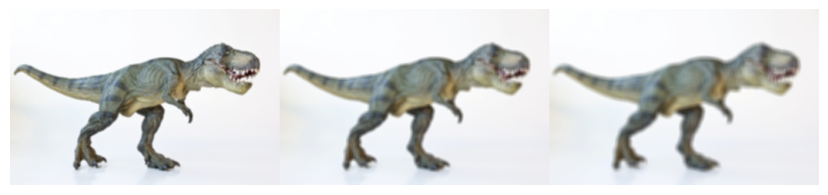

In [18]:
show(blurred_stack)

# Thresholding

In [19]:
image = cv2.imread(filename)

In [20]:
# turn the image grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

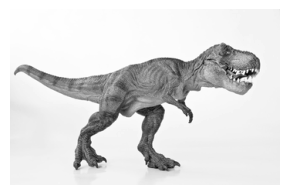

In [23]:
show_channel(gray_image)

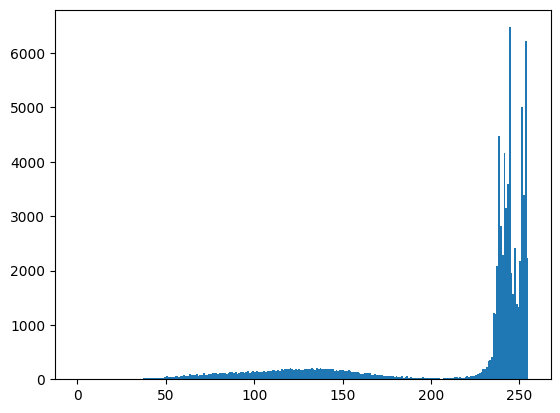

In [28]:
# plot histogram
plt.hist(gray_image.flatten(),255)
plt.show()

# Blurring

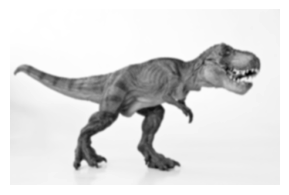

In [26]:
blurred = cv2.GaussianBlur(gray_image, (5,5), 0)
show_channel(blurred)

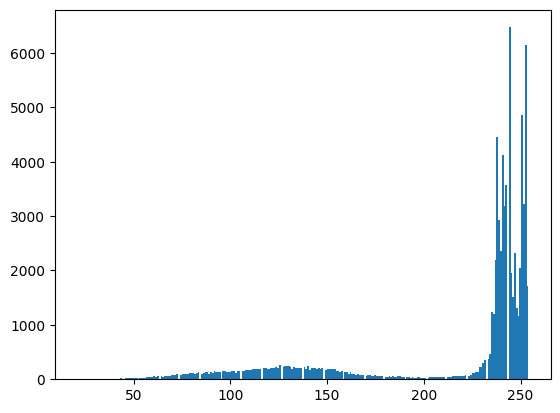

In [27]:
plt.hist(blurred.flatten(),255)
plt.show()

In [33]:
# the 200 is the threshold value, anything above that gets set to 255
# results in tuple, first value is the threshold value, second is the array of pixels for the binarized image
# by using an underscore, we throw away the first value, since it's unneeded
_, binary_image = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)

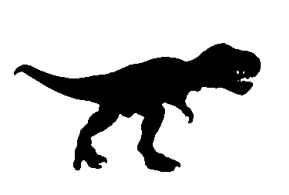

In [31]:
show_channel(binary_image)

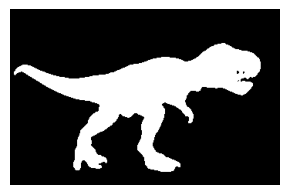

In [34]:
show_channel(cv2.bitwise_not(binary_image))


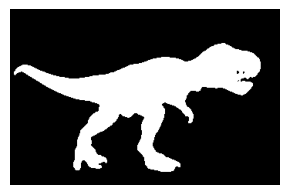

In [36]:
# this can be done with the first function by using vc2.THRESH_BINARY_INV
_, binary_image_inv = (cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV))
show_channel(binary_image_inv)

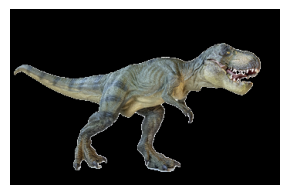

In [38]:
show(cv2.bitwise_and(image, image, mask = binary_image_inv))

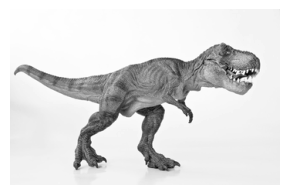

In [39]:
show_channel(gray_image)

# sobel

In [45]:
# the order of the 0 and 1 indicate which sobel kernel we want to use
sobel_horizontal = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0)
sobel_vertical = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1)

In [46]:
sobel_horizontal = np.uint8(np.absolute(sobel_horizontal))
sobel_vertical = np.uint8(np.absolute(sobel_vertical))

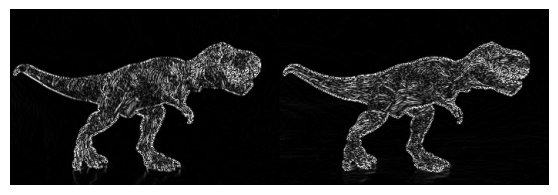

In [47]:
edges = np.hstack([sobel_horizontal, sobel_vertical])
show_channel(edges)